In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('./data-collection/Kidney_Disease/kidney.csv' )

In [3]:
df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


**Columns description**
* Bp - Blood Pressure
* Sg - Specific Gravity
* Al - Albumin
* Su - Sugar
* Rbc - Red Blood Cell
* Bu - Blood Urea
* Sc - Serum Creatinine
* Sod - Sodium
* Pot - Pottasium
* Hemo - Hemoglobin
* Wbcc - White Blood Cell Count
* Rbcc - Red Blood Cell Count
* Htn - Hypertension
* Class - Predicted Class

In [7]:
df.columns

Index(['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc',
       'Rbcc', 'Htn', 'Class'],
      dtype='object')

In [4]:
df.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [8]:
df.nunique()

Bp        11
Sg         5
Al         6
Su         6
Rbc        2
Bu       118
Sc        85
Sod       35
Pot       41
Hemo     116
Wbcc      90
Rbcc      46
Htn        3
Class      2
dtype: int64

In [9]:
df_duplicates = df[df.duplicated()]
df_duplicates.shape[0]

0

In [10]:
df.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

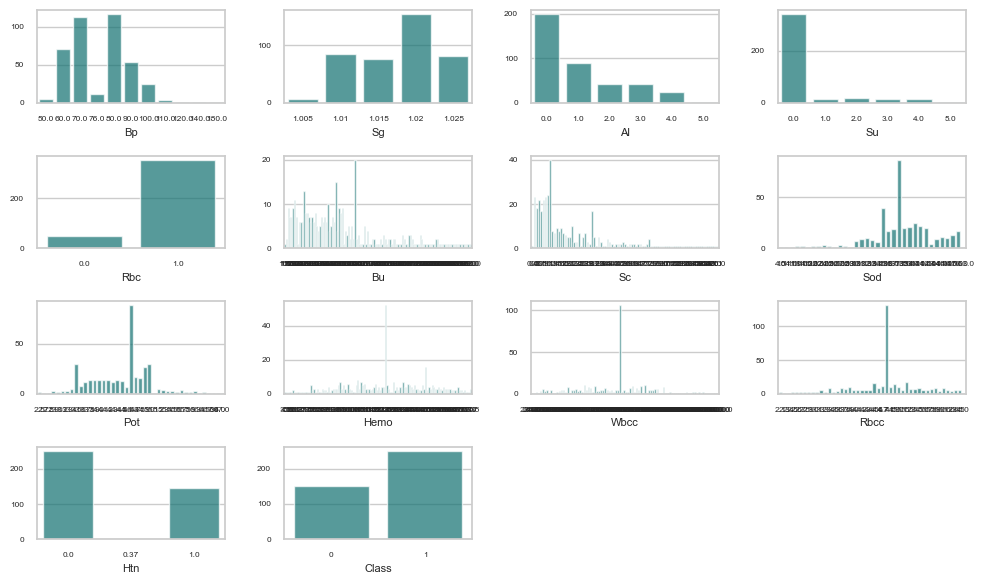

In [17]:
columns = df

sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
for i, cat_var in enumerate(columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=cat_var, color='Teal', alpha=0.7)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel(cat_var, fontsize=8)
    plt.ylabel('')

plt.tight_layout()
plt.show()

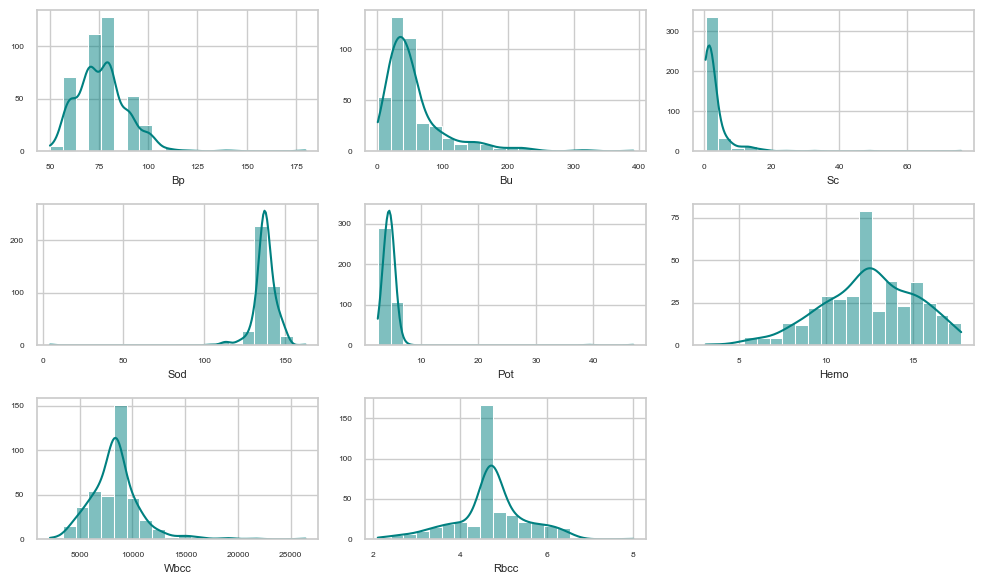

In [12]:
numerical_columns = ['Bp', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc']

sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
for i, var in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=var, kde=True, bins=20, color='Teal')
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel(var, fontsize=8)
    plt.ylabel('')
plt.tight_layout()
plt.show()

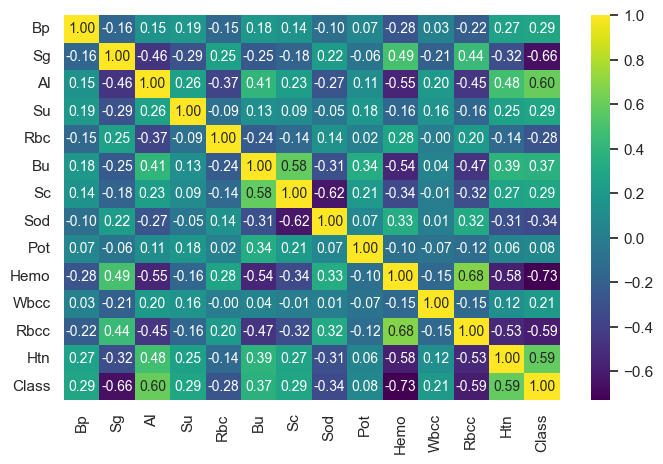

In [15]:
corr_df = df
corr_matrix = corr_df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, annot_kws={'size':10}, fmt='.2f', cmap='viridis')
plt.show()

In [19]:
# Split the data into features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix:")
print(confusion_rf)
print("Classification Report:")
print(report_rf)

Random Forest Classifier:
Accuracy: 1.00
Confusion Matrix:
[[28  0]
 [ 0 52]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [24]:
# Train a Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("Support Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm:.2f}")
print("Confusion Matrix:")
print(confusion_svm)
print("Classification Report:")
print(report_svm)

Support Vector Machine (SVM):
Accuracy: 0.99
Confusion Matrix:
[[27  1]
 [ 0 52]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      1.00      0.99        52

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [25]:
# Train a Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
confusion_nb = confusion_matrix(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print("Naive Bayes Classifier:")
print(f"Accuracy: {accuracy_nb:.2f}")
print("Confusion Matrix:")
print(confusion_nb)
print("Classification Report:")
print(report_nb)

Naive Bayes Classifier:
Accuracy: 0.95
Confusion Matrix:
[[28  0]
 [ 4 48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.92      0.96        52

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



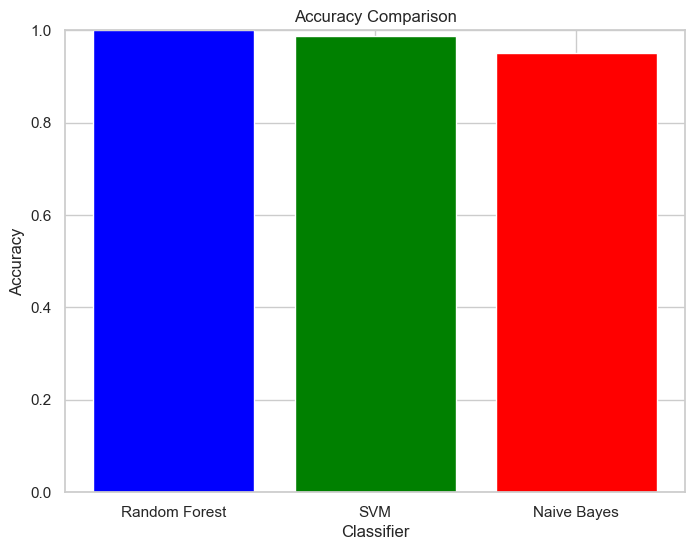

In [26]:
# Bar Chart for Accuracy
classifiers = ["Random Forest", "SVM", "Naive Bayes"]
accuracy_scores = [accuracy_rf, accuracy_svm, accuracy_nb]

plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.ylim(0, 1)
plt.show()